In [1]:
from PIL import Image
import sys
sys.path.append("../")
from cascade_detector import PNet, RNet, ONet, CascadeDetector, show_bboxes

In [2]:
pnet = PNet()
rnet = RNet()
onet = ONet()
pnet_weight = "../models/pnet.pt"
rnet_weight = "../models/rnet.pt"
onet_weight = "../models/onet.pt"

In [3]:
mtcnn = CascadeDetector(pnet,
                        rnet,
                        onet,
                        input_size=[12, 24, 48],
                        image_pyramid_factor=0.707,
                        min_face_size=15,
                        min_detection_stride=2,
                        normalize_mean=127.5,
                        normalize_std=128,
                        cls_thresholds=[0.6, 0.7, 0.8],
                        nms_thresholds=[0.7, 0.7, 0.7],
                        pnet_params=pnet_weight,
                        rnet_params=rnet_weight,
                        onet_params=onet_weight,
                        device="cpu",
                        backend="pillow")

In [4]:
mtcnn

MTCNN:

Image Pyramid(
  min_face_size=15                
  min_detection_size=12                
  factor:0.707
)

PNet(
  (features): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): PReLU(num_parameters=10)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): PReLU(num_parameters=16)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (6): PReLU(num_parameters=32)
  )
  (face_cls): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
  (bbox_reg): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
)

Stage Bridge(
  Choose(threshold=0.6)
  NMS(threshold=0.7)
  Resize(size=24)
)

RNet(
  (features): Sequential(
    (0): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
    (1): PReLU(num_parameters=28)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
    (4): PRe

In [5]:
image = Image.open("../assets/example.jpg")

In [6]:
bboxes, landmarks = mtcnn(image)

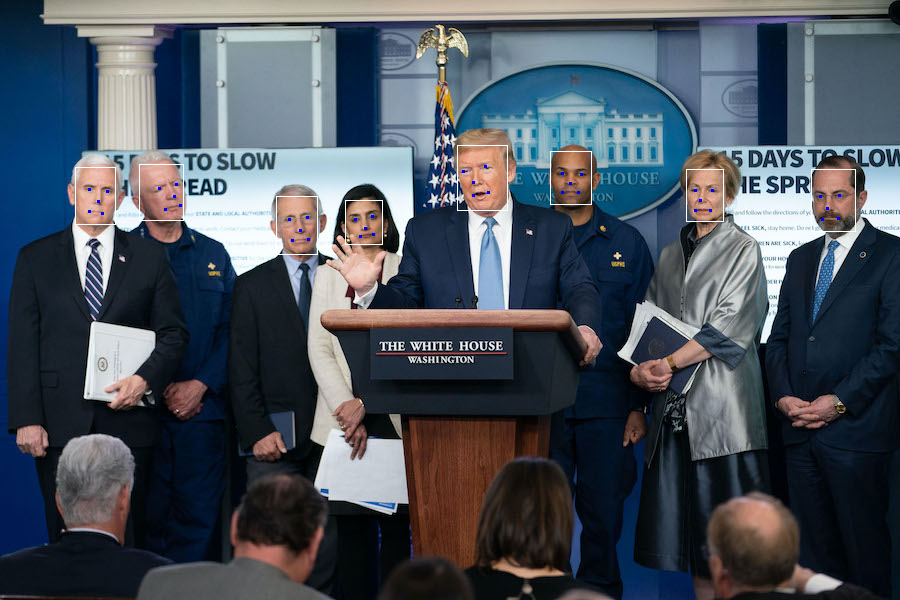

In [7]:
show_bboxes(image, bboxes, landmarks)